<a href="https://colab.research.google.com/github/Yogesh-8998/Yogesh-Patil/blob/main/CHD_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
 
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 df = pd.read_csv("/content/drive/MyDrive/Almabetter /Machine Learning/Capstone Project /data_cardiovascular_risk.csv")

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Missing values
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [ ]:
 # percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


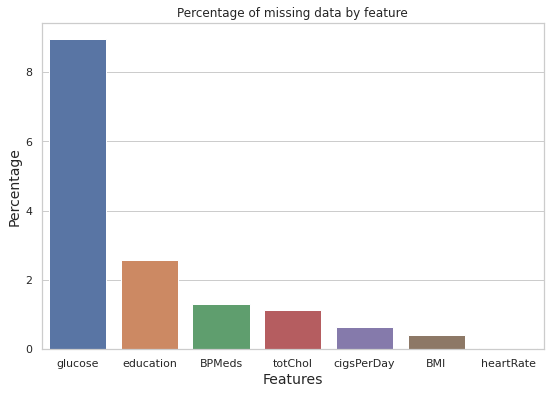

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

Glucose level has the highest percentage of missing values i.e 8.96%, remaing have very few missing values. As of total 15.04% missing values we have.

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# columns = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [ ]:
numeric_features = df.describe().columns

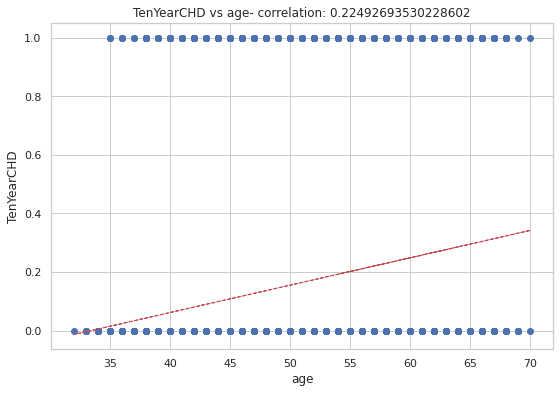

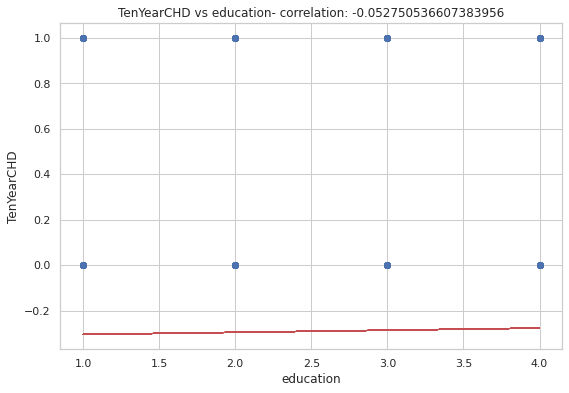

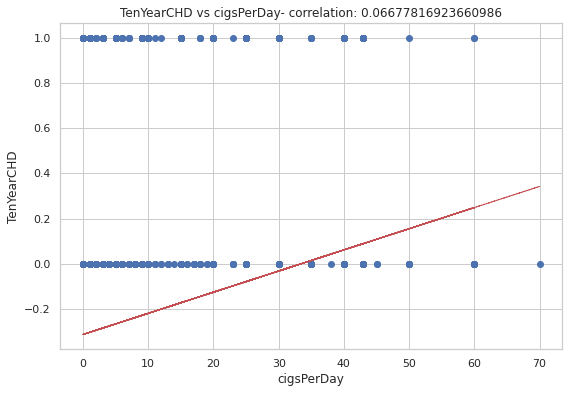

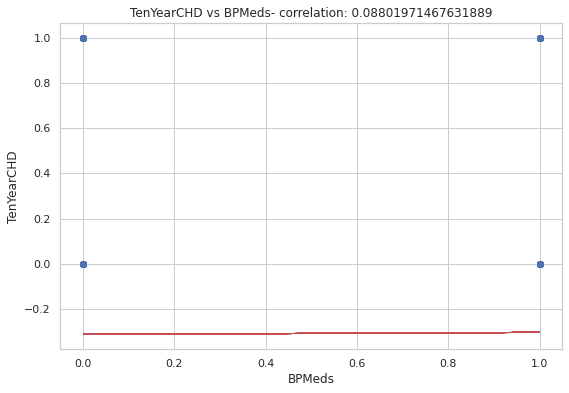

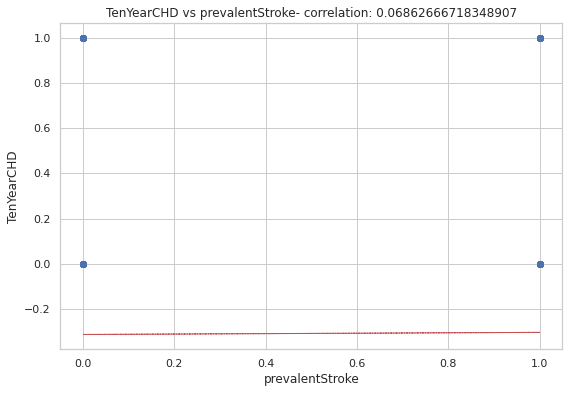

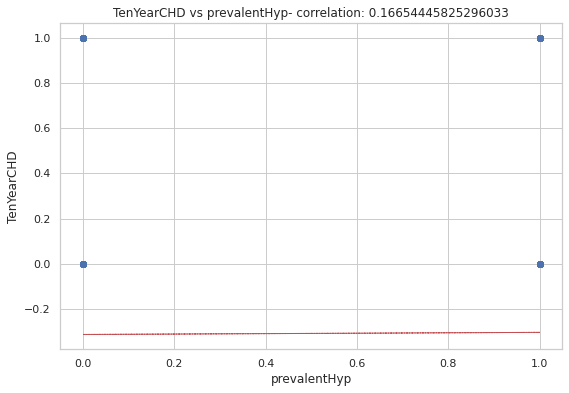

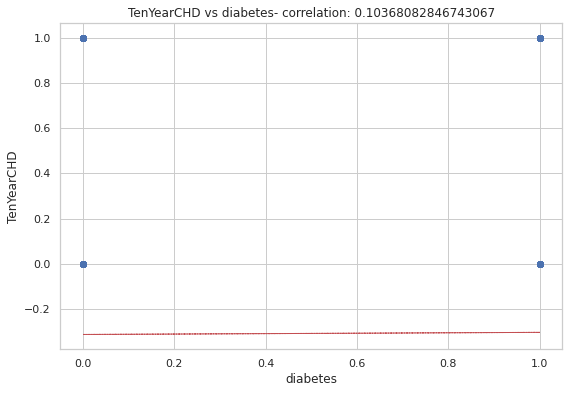

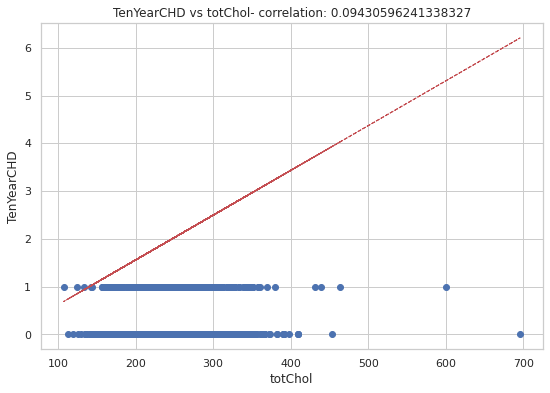

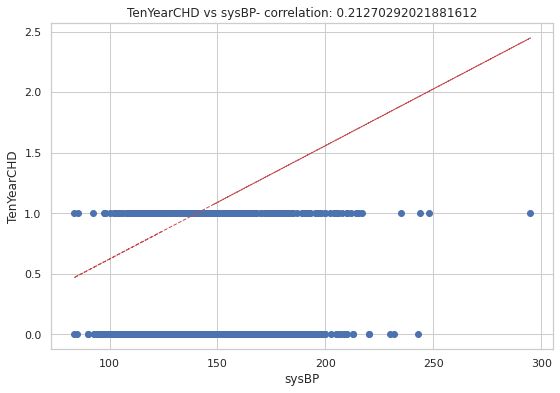

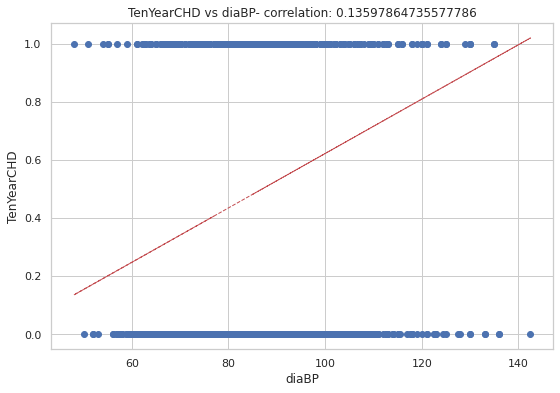

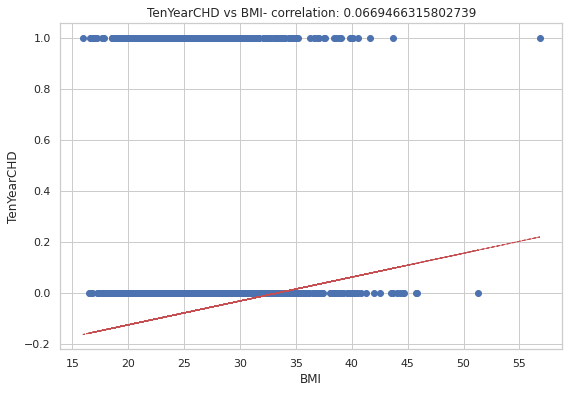

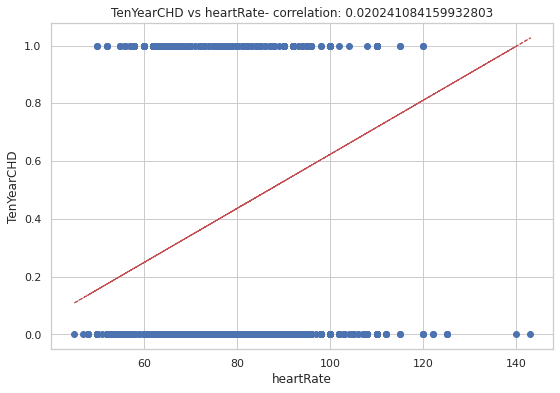

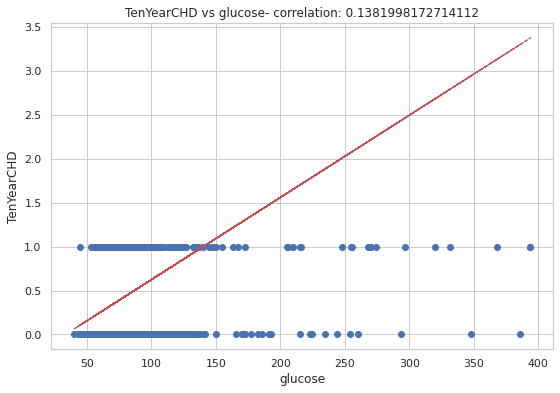

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['TenYearCHD']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col + '- correlation: ' + str(correlation))
    # z = np.polyfit(df[col], df['TenYearCHD'], 1)
    y_hat = np.poly1d(z)(df[col])
 
    plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

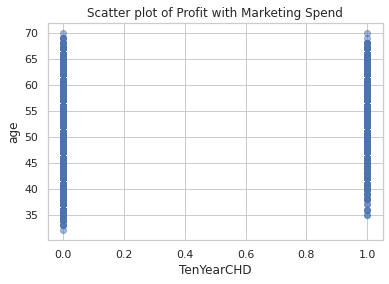

In [ ]:
# for i in df:
plt.scatter(df['TenYearCHD'], df['age'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('TenYearCHD')
plt.ylabel('age')
plt.show()

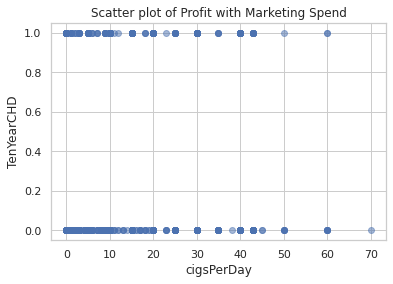

In [ ]:
plt.scatter(df['cigsPerDay'], df['TenYearCHD'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('cigsPerDay')
plt.ylabel('TenYearCHD')
plt.show()

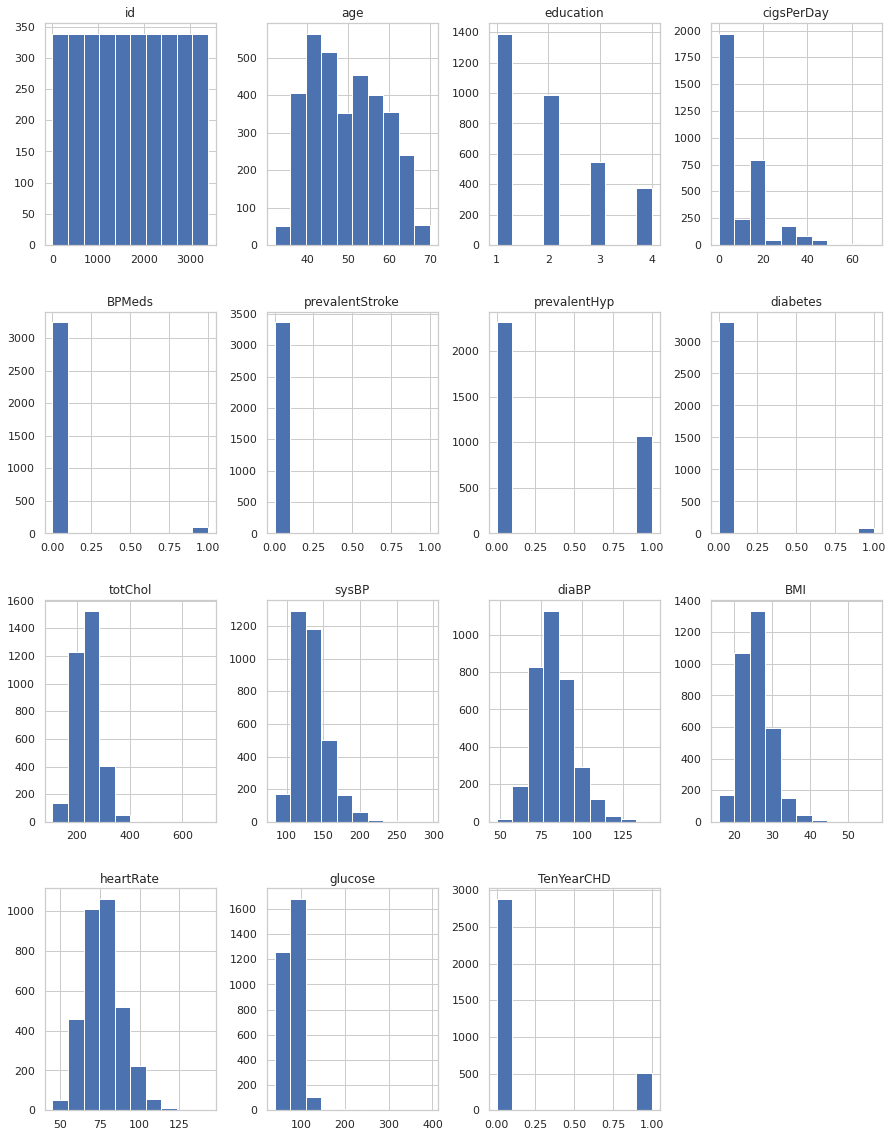

In [ ]:
 # plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

As prevstroke, diabetes and BP meds are too poorly balanced data

Case counts

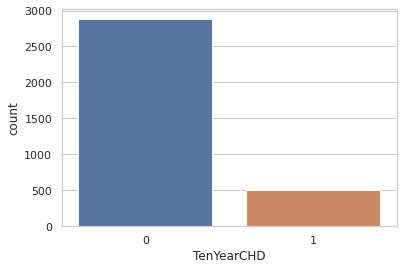

There are 2879 patients without heart disease and 511 patients with the disease


In [ ]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

No. of people disease vs Age

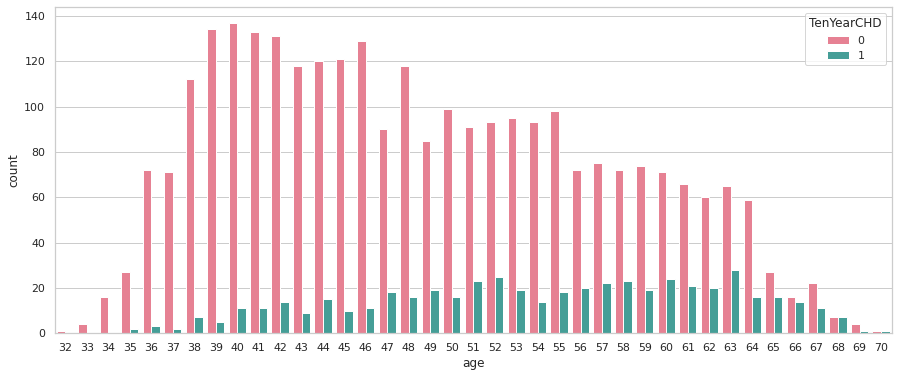

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()

The People With the highest risk of developing CHD are b/w 51 and 63

Correlation Heatmap

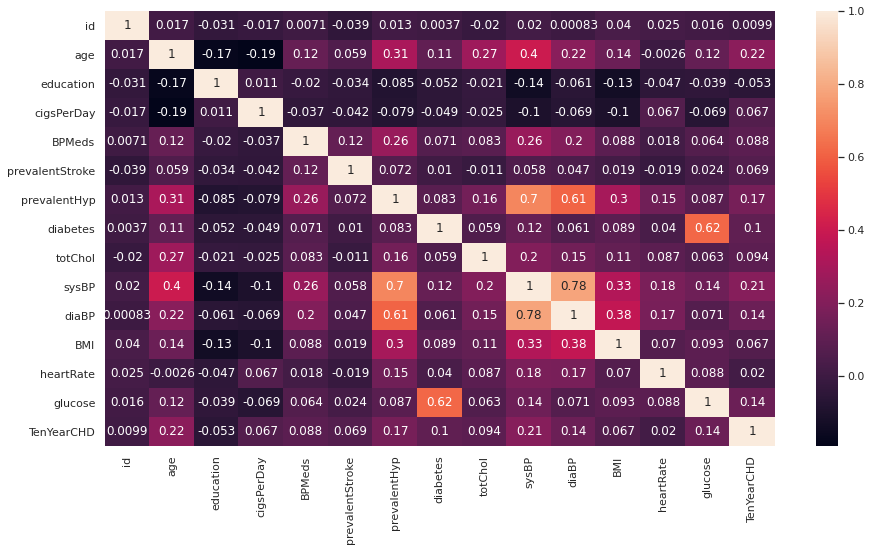

In [ ]:
 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

High Correlation b/w the independant valiables systolic Bp and pevalentHyp, dia BP and pevalent Hyp, glucose and diabetes, systolic BP and Distolic BP

High Correlation b/w Target and independent vars are Age, prevalent Hyp, Systolic BP, glucose, Distolic BP and Diabetes. As if 6 vars are good corelating.

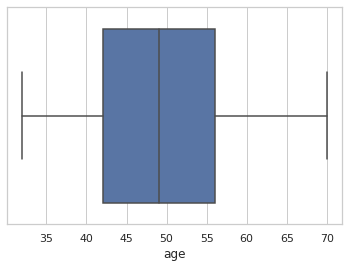

In [ ]:
 
import seaborn as sns
 
sns.boxplot(df['age'])

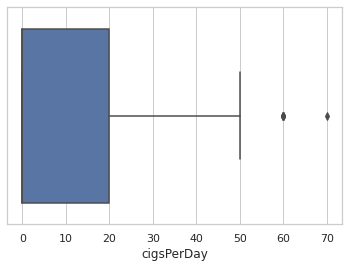

In [ ]:
 sns.boxplot(df['cigsPerDay'])

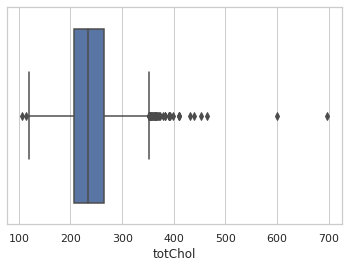

In [ ]:
 sns.boxplot(df['totChol'])

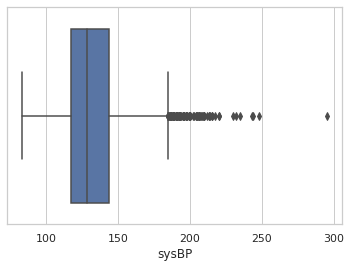

In [ ]:
 sns.boxplot(df['sysBP'])

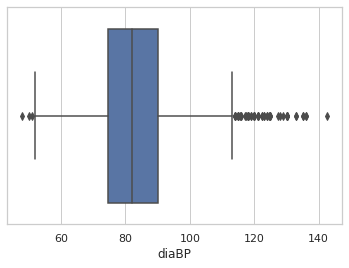

In [ ]:
 sns.boxplot(df['diaBP'])

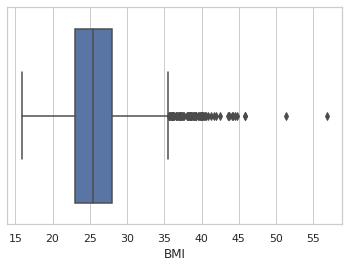

In [ ]:
 sns.boxplot(df['BMI'])

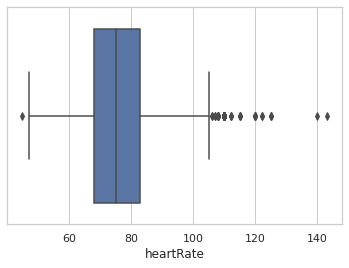

In [ ]:
 sns.boxplot(df['heartRate'])

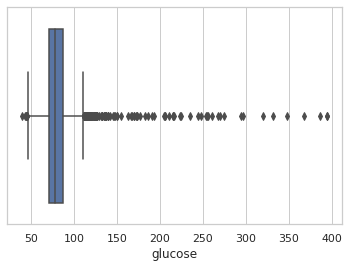

In [ ]:
 sns.boxplot(df['glucose'])

In [1]:
 fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2
 
#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'F', 1:'M'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
# stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

NameError: ignored